In [1]:
import sys
sys.path.append('../src/') 

import importlib
import fonctions_couleur  
import numpy as np

import fonctions_image

importlib.reload(fonctions_couleur)
importlib.reload(fonctions_image)

from fonctions_couleur import * 
from fonctions_image import *  

Found 13 valid pieces
Piece areas: [119644, 137857, 127295, 115684, 143516, 114006, 143175, 118566, 130832, 122840, 154187, 138620, 158065]


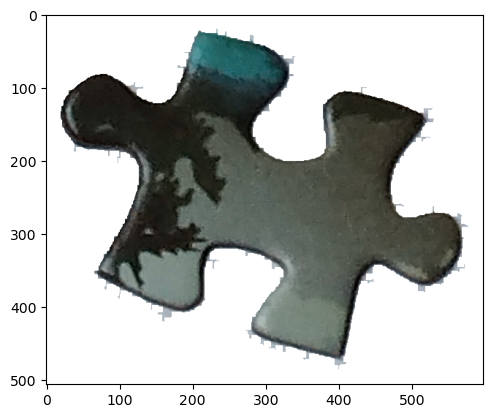

In [2]:
puzzle_yak=cv2.imread('../puzzles/yakari.jpg')
photo_yak=cv2.imread('../media/test_2.jpg')
pieces=extract_pieces(photo_yak)
piece_temp=pieces[2]["matching_image"]
grid_yak=split_image_to_grid(puzzle_yak, 7, 7)
plt.imshow(piece_temp)

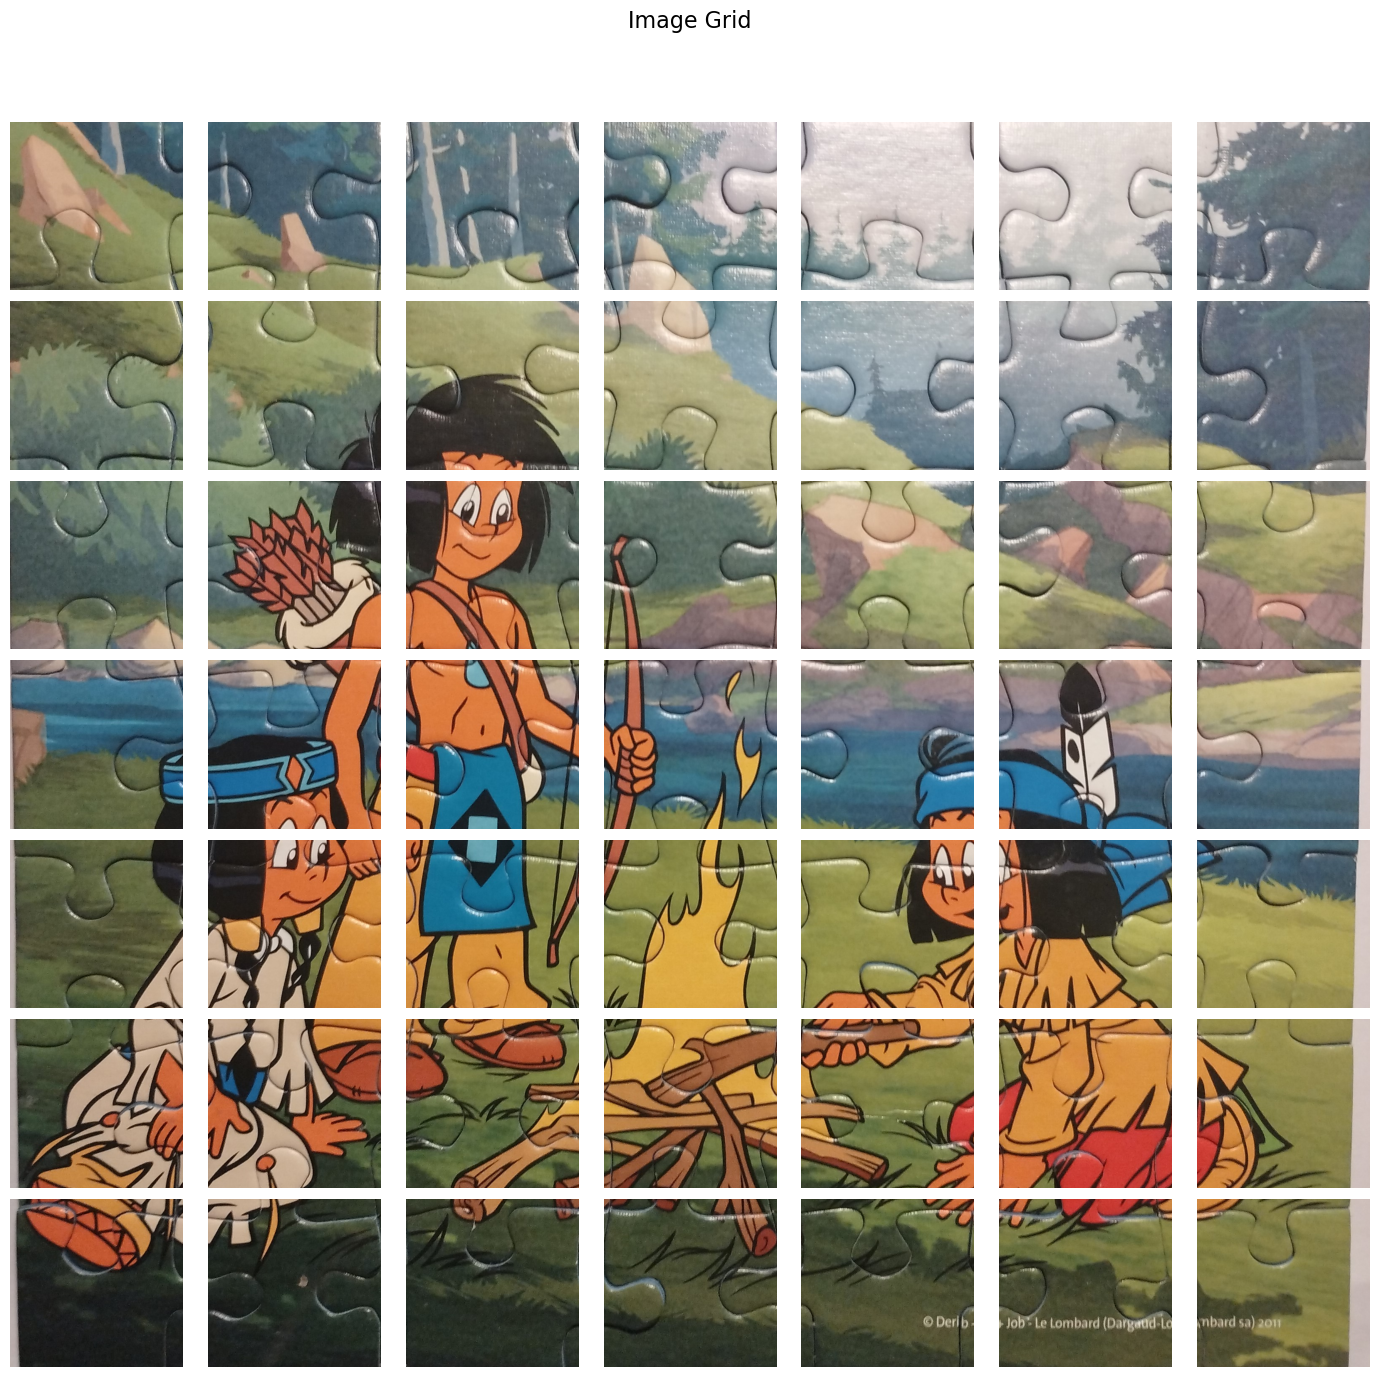

In [3]:
display_image_grid(grid_yak)

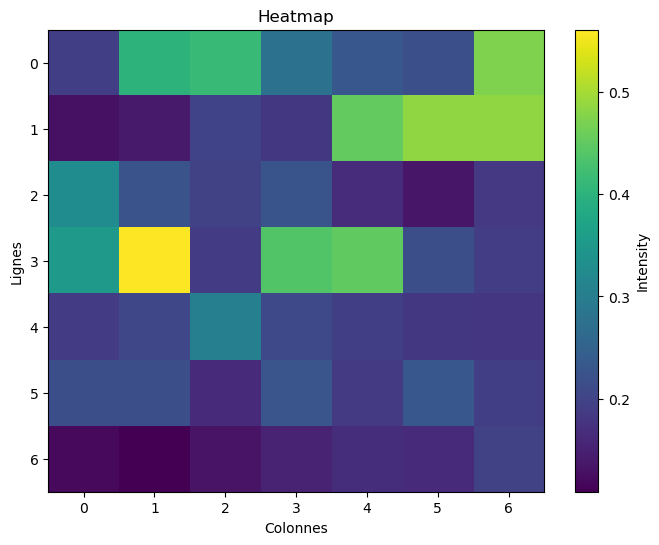

In [4]:
sim_matrix=compute_similarity_matrix( grid_yak, piece_temp)
display_heatmap(sim_matrix)

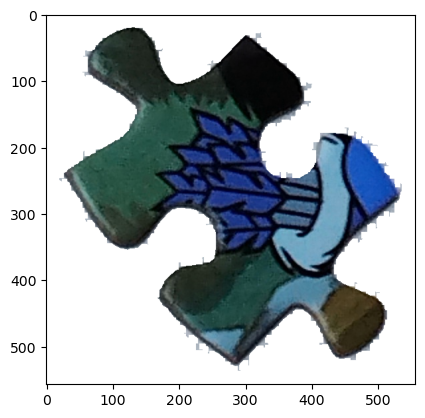

In [5]:

plt.imshow(pieces[1]['matching_image'])



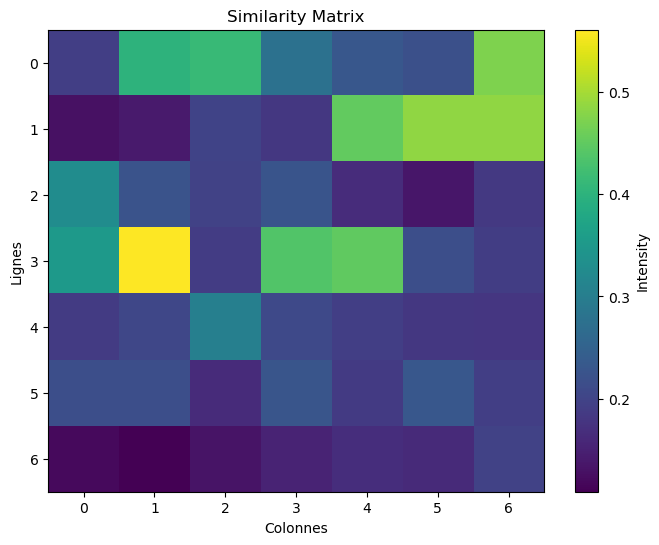

In [6]:
display_heatmap(sim_matrix, title="Similarity Matrix", cmap="viridis")

## calcul d'homographie pour avoir un scaling

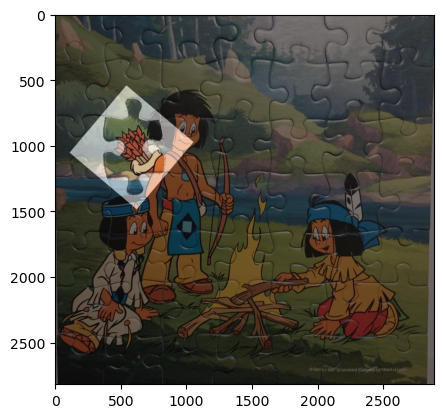

1.203816295232565


In [ ]:
sift=cv2.SIFT_create()
piece1=pieces[1]
piece_im=piece1["matching_image"]
puzzle=puzzle_yak
kp_im, des_im=calculate_keypoints_sift(sift,piece1)

kp_puzzle, des_puzzle=sift.detectAndCompute(puzzle, None)
matches=calculate_matches(piece1,puzzle,kp_im,des_im, kp_puzzle,des_puzzle)

Hs=homography_unknown_scale(kp_im, kp_puzzle, matches )
s, theta, t=decompose_similarity_homography(Hs)
show_homography_on_puzzle(piece_im, puzzle, Hs)

print (s)

## méthode 2 

In [10]:
m0 = pieces[2]["matching_image"]
mask0 = pieces[2]["binary_mask"]

m0 = np.rot90(m0, -1)
mask0 = np.rot90(mask0, -1)
mask_puzzle = np.ones(puzzle_yak.shape[:2], dtype=np.uint8) * 255
square_size_puzzle = 60
s = 2  # Example scaling factor (adjust as needed)
square_size_im = int(square_size_puzzle / s)

des0 = create_descriptor(m0, get_mask_with_margin(mask0, margin=15), square_size_im, crop_to_mask=True)

des_puzzle = create_descriptor(puzzle_yak, mask_puzzle, square_size_puzzle, crop_to_mask=False)

matches, map = search_puzzle_for_piece(puzzle_yak, mask_puzzle, m0, mask0, square_size_puzzle, square_size_im, 15)




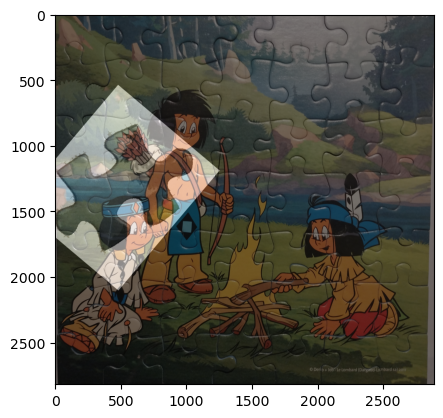

In [11]:
pos, dis=matches[1]
H = homography_matrix(s, theta, pos)
show_homography_on_puzzle(m0, puzzle_yak, H)

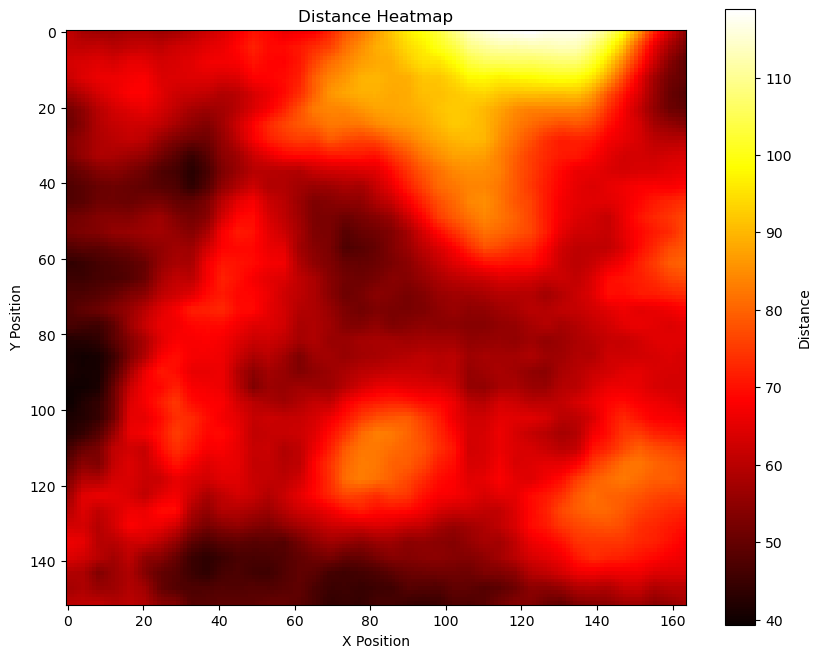

In [12]:
from scipy.ndimage import zoom

def display_distance_heatmap(distance_map, puzzle_square_size, interpolation_factor=4):
    """
    Display the distance map as a heatmap with improved readability through interpolation.

    Parameters:
        distance_map (numpy array): 2D array representing distances at each position.
        puzzle_square_size (int): Size of the square blocks in the puzzle.
        interpolation_factor (int): Factor to upscale the distance map for smoother visualization.
    """
    distance_map_display = np.copy(distance_map)
    nan_mask = np.isnan(distance_map_display)
    distance_map_display[nan_mask] = np.max(distance_map_display[~nan_mask]) + 1

    distance_map_interpolated = zoom(distance_map_display, interpolation_factor, order=1)

    plt.figure(figsize=(10, 8))
    plt.imshow(distance_map_interpolated, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Distance')
    plt.title('Distance Heatmap')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.show()

display_distance_heatmap(map, square_size_puzzle, interpolation_factor=4)